# Demo 
___

In [28]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from database import *
from encoder import *
from tripletLoss import *

### 1. Chargement des données 

* UCR : https://www.cs.ucr.edu/~eamonn/time_series_data_2018/

* UEA : http://www.timeseriesclassification.com/

* Consommation éléctrique (puissance énergétique) journalière individuelle : https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [29]:
dataset = LoadDataset(dataset='CBF', pack='TRAIN')

In [30]:
dataset[0]

(tensor([[-1.5172, -0.3327, -0.1252, -0.3104, -0.1372,  0.2850, -0.1117, -0.4654,
          -0.2738,  0.1365,  0.2549, -0.8622, -0.0834, -0.4631, -0.2271, -1.3034,
          -0.8521,  0.0549,  0.3054, -0.6027, -0.5218, -0.7822, -0.2223,  0.0468,
          -0.3218, -0.6285, -1.0539, -0.7323,  0.6770, -0.3284,  0.0718, -0.6886,
          -0.0754,  0.6103, -0.1360, -0.6433,  0.2518,  0.8214,  0.2544,  0.5303,
           1.3177,  0.5797, -0.1643,  0.9813,  1.4554,  1.4296,  1.1765,  0.7296,
           1.4243,  1.7796,  1.2024,  1.9604,  1.6170,  1.2329,  1.3621,  2.6736,
           1.8309,  1.0942,  2.2502,  2.2233,  2.6356,  2.1655,  2.4820,  2.8700,
           3.0771,  0.0107, -0.7834,  0.1407,  0.1536, -0.9888, -1.0022, -0.6775,
          -1.7875, -1.0950, -0.7165,  0.0731, -0.9319, -1.0799, -0.0998, -0.7786,
          -0.2751,  0.1264, -1.2420,  0.1089,  0.1335, -0.6070, -0.4346, -0.5991,
          -0.4130, -1.1651, -1.0596,  0.1079, -0.0887, -0.0095, -1.6825, -0.9113,
          -0.305

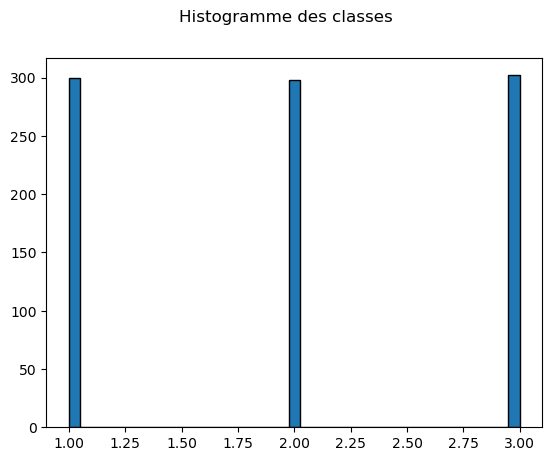

In [31]:
classes = []
for i in range(len(dataset)):
    _, label  = dataset[i]
    classes.append(label.item())

plt.hist(classes, bins=39, edgecolor='k')
plt.suptitle('Histogramme des classes')
plt.show()

In [32]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


### 2. Modèles + entrainements

In [33]:
from encoder import *

In [46]:
in_channels = 1          # nombre de canaux du signal d'entrée (en pratique un)
out_channels = 80       # dimensionalité souhaitée pour la représentation abstraite du signal
kernel_size = 3          # taille du noyau de convolution
depth = 10               # profondeur de convolutions dilatées
hidden_channels = 30     # nombre de canaux cachés des convolutions dilatées
lr = 0.001               # taux d'apprentissage initial
CNN_out_channels = 60   # nombre de canaux sortants de convolutions

In [47]:
Model = Encoder(
    in_channels=in_channels, 
    hidden_CNN_channels=hidden_channels, 
    hidden_out_CNN_channels=CNN_out_channels, 
    out_channels=out_channels, 
    CNN_depth=depth, 
    kernel_size=kernel_size, 
)

In [48]:
train = torch.tensor(np.array([x for x, _ in dataset]))

In [113]:
from tripletLoss import TripletLoss
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train.to(device)
Model.to(device)

criterion = TripletLoss(50, 10, 1).to(device)

optimizer = torch.optim.Adam(Model.parameters(), lr=lr)

n_epochs = 60

Tloss = []

for epoch in range(n_epochs):

    loss_items = []

    for X, _ in tqdm(dataloader):

        X = X.to(device)

        optimizer.zero_grad()

        loss = criterion(X, Model, train)

        loss.backward()

        optimizer.step()

        loss_items.append(loss.item())

    print(f'  - Epoch {epoch+1}/{n_epochs}, Loss: {np.mean(loss_items):.4f}  ')
    Tloss.append(np.mean(loss_items))

    if epoch%5 == 0:
        torch.save(Model.state_dict(), f'pths/model_{epoch}.pt')




100%|██████████| 29/29 [00:05<00:00,  5.31it/s]


  - Epoch 1/60, Loss: 1.0074  


100%|██████████| 29/29 [00:05<00:00,  5.71it/s]


  - Epoch 2/60, Loss: 0.9180  


100%|██████████| 29/29 [00:04<00:00,  5.87it/s]


  - Epoch 3/60, Loss: 0.9039  


100%|██████████| 29/29 [00:05<00:00,  5.77it/s]


  - Epoch 4/60, Loss: 0.8949  


100%|██████████| 29/29 [00:05<00:00,  5.53it/s]


  - Epoch 5/60, Loss: 0.9494  


100%|██████████| 29/29 [00:05<00:00,  5.62it/s]


  - Epoch 6/60, Loss: 0.8875  


100%|██████████| 29/29 [00:05<00:00,  5.67it/s]


  - Epoch 7/60, Loss: 0.9152  


100%|██████████| 29/29 [00:04<00:00,  5.81it/s]


  - Epoch 8/60, Loss: 0.9385  


100%|██████████| 29/29 [00:05<00:00,  5.80it/s]


  - Epoch 9/60, Loss: 0.9204  


100%|██████████| 29/29 [00:04<00:00,  5.90it/s]


  - Epoch 10/60, Loss: 0.9378  


100%|██████████| 29/29 [00:04<00:00,  5.85it/s]


  - Epoch 11/60, Loss: 0.9152  


100%|██████████| 29/29 [00:04<00:00,  5.93it/s]


  - Epoch 12/60, Loss: 0.9123  


100%|██████████| 29/29 [00:04<00:00,  5.93it/s]


  - Epoch 13/60, Loss: 0.9165  


100%|██████████| 29/29 [00:04<00:00,  5.93it/s]


  - Epoch 14/60, Loss: 0.9280  


100%|██████████| 29/29 [00:04<00:00,  5.85it/s]


  - Epoch 15/60, Loss: 0.9085  


100%|██████████| 29/29 [00:05<00:00,  5.33it/s]


  - Epoch 16/60, Loss: 0.9464  


100%|██████████| 29/29 [00:05<00:00,  5.53it/s]


  - Epoch 17/60, Loss: 0.8864  


100%|██████████| 29/29 [00:04<00:00,  5.86it/s]


  - Epoch 18/60, Loss: 0.9026  


100%|██████████| 29/29 [00:04<00:00,  5.89it/s]


  - Epoch 19/60, Loss: 0.9015  


100%|██████████| 29/29 [00:05<00:00,  5.55it/s]


  - Epoch 20/60, Loss: 0.9496  


100%|██████████| 29/29 [00:05<00:00,  5.76it/s]


  - Epoch 21/60, Loss: 0.9151  


100%|██████████| 29/29 [00:05<00:00,  5.70it/s]


  - Epoch 22/60, Loss: 0.9289  


100%|██████████| 29/29 [00:04<00:00,  5.82it/s]


  - Epoch 23/60, Loss: 0.9376  


100%|██████████| 29/29 [00:05<00:00,  5.74it/s]


  - Epoch 24/60, Loss: 0.9436  


100%|██████████| 29/29 [00:05<00:00,  5.63it/s]


  - Epoch 25/60, Loss: 0.9039  


100%|██████████| 29/29 [00:05<00:00,  5.66it/s]


  - Epoch 26/60, Loss: 0.9019  


100%|██████████| 29/29 [00:05<00:00,  5.67it/s]


  - Epoch 27/60, Loss: 0.8996  


100%|██████████| 29/29 [00:05<00:00,  5.57it/s]


  - Epoch 28/60, Loss: 0.9172  


100%|██████████| 29/29 [00:05<00:00,  5.51it/s]


  - Epoch 29/60, Loss: 0.9201  


100%|██████████| 29/29 [00:05<00:00,  5.40it/s]


  - Epoch 30/60, Loss: 0.9484  


100%|██████████| 29/29 [00:05<00:00,  5.33it/s]


  - Epoch 31/60, Loss: 0.9071  


100%|██████████| 29/29 [00:05<00:00,  5.28it/s]


  - Epoch 32/60, Loss: 0.8741  


100%|██████████| 29/29 [00:05<00:00,  5.32it/s]


  - Epoch 33/60, Loss: 0.9017  


100%|██████████| 29/29 [00:05<00:00,  5.73it/s]


  - Epoch 34/60, Loss: 0.9045  


100%|██████████| 29/29 [00:05<00:00,  5.78it/s]


  - Epoch 35/60, Loss: 0.8850  


100%|██████████| 29/29 [00:05<00:00,  5.62it/s]


  - Epoch 36/60, Loss: 0.9163  


100%|██████████| 29/29 [00:05<00:00,  5.78it/s]


  - Epoch 37/60, Loss: 0.8962  


100%|██████████| 29/29 [00:05<00:00,  5.75it/s]


  - Epoch 38/60, Loss: 0.9007  


100%|██████████| 29/29 [00:05<00:00,  5.68it/s]


  - Epoch 39/60, Loss: 0.9390  


100%|██████████| 29/29 [00:04<00:00,  5.83it/s]


  - Epoch 40/60, Loss: 0.8959  


100%|██████████| 29/29 [00:05<00:00,  5.79it/s]


  - Epoch 41/60, Loss: 0.8736  


100%|██████████| 29/29 [00:04<00:00,  5.85it/s]


  - Epoch 42/60, Loss: 0.9171  


100%|██████████| 29/29 [00:05<00:00,  5.78it/s]


  - Epoch 43/60, Loss: 0.9594  


100%|██████████| 29/29 [00:05<00:00,  5.76it/s]


  - Epoch 44/60, Loss: 0.9351  


100%|██████████| 29/29 [00:05<00:00,  5.72it/s]


  - Epoch 45/60, Loss: 0.9222  


100%|██████████| 29/29 [00:05<00:00,  5.75it/s]


  - Epoch 46/60, Loss: 0.8838  


100%|██████████| 29/29 [00:05<00:00,  5.71it/s]


  - Epoch 47/60, Loss: 0.9151  


100%|██████████| 29/29 [00:05<00:00,  5.69it/s]


  - Epoch 48/60, Loss: 0.9229  


100%|██████████| 29/29 [00:05<00:00,  5.72it/s]


  - Epoch 49/60, Loss: 0.9029  


100%|██████████| 29/29 [00:05<00:00,  5.72it/s]


  - Epoch 50/60, Loss: 0.8871  


100%|██████████| 29/29 [00:04<00:00,  5.86it/s]


  - Epoch 51/60, Loss: 0.8828  


100%|██████████| 29/29 [00:04<00:00,  5.84it/s]


  - Epoch 52/60, Loss: 0.8960  


100%|██████████| 29/29 [00:04<00:00,  5.85it/s]


  - Epoch 53/60, Loss: 0.8857  


100%|██████████| 29/29 [00:05<00:00,  5.72it/s]


  - Epoch 54/60, Loss: 0.9048  


100%|██████████| 29/29 [00:05<00:00,  5.76it/s]


  - Epoch 55/60, Loss: 0.8899  


100%|██████████| 29/29 [00:05<00:00,  5.70it/s]


  - Epoch 56/60, Loss: 0.9128  


100%|██████████| 29/29 [00:05<00:00,  5.72it/s]


  - Epoch 57/60, Loss: 0.9294  


100%|██████████| 29/29 [00:05<00:00,  5.70it/s]


  - Epoch 58/60, Loss: 0.9031  


100%|██████████| 29/29 [00:04<00:00,  5.82it/s]


  - Epoch 59/60, Loss: 0.8948  


100%|██████████| 29/29 [00:05<00:00,  5.62it/s]

  - Epoch 60/60, Loss: 0.9044  


### 3. Résultats

*Extraction des vecteurs de représentation sur les données d'entrainement*

In [114]:
x, _ = dataset[0]
x = x.to(device)

torch.cuda.empty_cache()

Model.eval()
with torch.no_grad():
    res = Model(train.to(device))

res = []
with torch.no_grad():
    res = [Model(train[i].to(device).unsqueeze(0)) for i in range(train.size(0))]
    res = torch.stack(res)

data = pd.DataFrame(res.squeeze().cpu().numpy())
data['target'] = classes
data = data.sort_values(by='target')
data.head()


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,target
449,0.019460,-0.047743,0.051025,0.255601,0.428069,0.076613,0.256262,-0.210622,0.295664,0.050006,...,0.214538,0.130050,0.061515,0.175029,-0.084019,-0.002672,-0.049332,0.179730,-0.160444,1
470,-0.178549,0.495139,-0.364875,0.270960,-0.067405,-0.065369,-0.189718,0.245025,0.284901,0.044617,...,-0.107381,0.182278,-0.251689,-0.247094,0.251426,0.067946,-0.065294,-0.143833,-0.512963,1
464,0.275448,-0.008849,0.234608,0.109773,-0.107149,-0.278195,-0.029373,-0.049690,0.264231,0.079616,...,-0.348822,0.091359,0.154676,-0.433897,0.165848,0.302072,-0.211546,0.096999,-0.301779,1
462,-0.140160,0.299312,-0.202587,0.280550,0.247930,0.204158,-0.140990,-0.234483,0.135659,-0.060226,...,0.126219,-0.067398,-0.154094,-0.074332,0.001566,-0.041033,-0.107831,-0.032276,-0.289919,1
460,-0.157489,0.239739,-0.105636,-0.089057,0.070960,0.119553,-0.022088,-0.325062,0.045723,-0.366511,...,-0.486731,-0.086611,0.118625,-0.043205,-0.209327,0.035894,-0.426191,-0.179463,-0.155213,1


*Visualisation brute des données triées par classe :*

(900, 80)


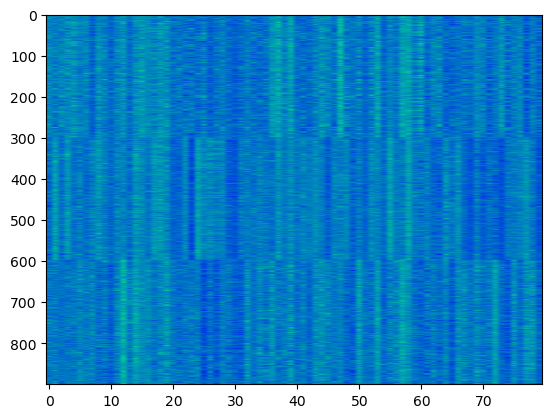

In [115]:
import matplotlib.pyplot as plt

print(res.cpu().numpy().squeeze().shape)

train_projection = res.cpu().numpy().squeeze()

plt.imshow(data.iloc[:,:-1].to_numpy(), cmap='winter', aspect='auto')

*PCA dim 2*

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_result = pca.fit_transform(train_projection)

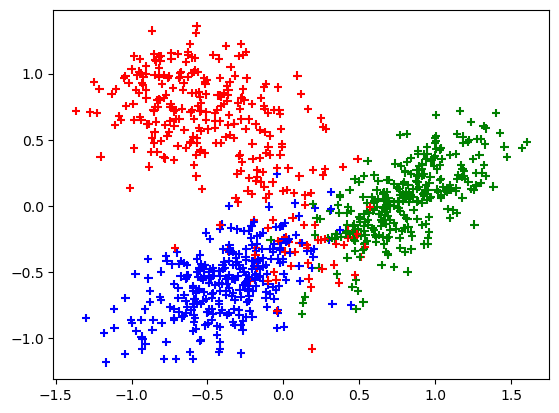

In [117]:
from matplotlib.colors import ListedColormap

plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='+', c=classes, cmap=ListedColormap(['red', 'green', 'blue']))
